In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'Nimbus Sans'
plt.rcParams['font.size'] = 10

In [2]:
# bombus_listdir = [file for file in os.listdir('/home/misha/data/bee_cam/all_bombus') if file.endswith('.jpg')]
# file_df = pd.DataFrame(bombus_listdir)
# file_df[['pi', 'datetime']] = file_df[0].str.extract(r'^pi(\d+)_(\d{8}_\d{6})')
# file_df['pi'] = file_df['pi'].astype(int)
# file_df['datetime'] = pd.to_datetime(file_df['datetime'], format='%Y%m%d_%H%M%S')
# file_df = file_df.rename(columns={0: 'filename'})
# file_df = file_df.sort_values(by=['pi', 'datetime'], ascending=[True, True]).reset_index(drop=True)
# file_df['date'] = file_df['datetime'].dt.date


file_df = pd.read_csv('csvs/clean_dfs/bombus_df.csv')
file_df['datetime'] = pd.to_datetime(file_df['datetime'], format='%Y-%m-%d %H:%M:%S')

In [3]:
file_df

,filename,species,sex,pi,datetime,date,time_diff
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,NaN
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,NaN
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,3149.0
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,2741.0
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,5154.0
...,...,...,...,...,...,...,...
1853,pi8_20240825_133559.jpg,fervidus,male,8,2024-08-25 13:35:59,2024-08-25,NaN
1854,pi9_20240804_120508.jpg,vosnesenskii,female,9,2024-08-04 12:05:08,2024-08-04,NaN
1855,pi9_20240804_121508.jpg,nevadensis,male,9,2024-08-04 12:15:08,2024-08-04,NaN
1856,pi9_20240804_121509.jpg,nevadensis,male,9,2024-08-04 12:15:09,2024-08-04,1.0


(array([0.000e+00, 1.359e+03, 1.910e+02, 1.200e+01, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

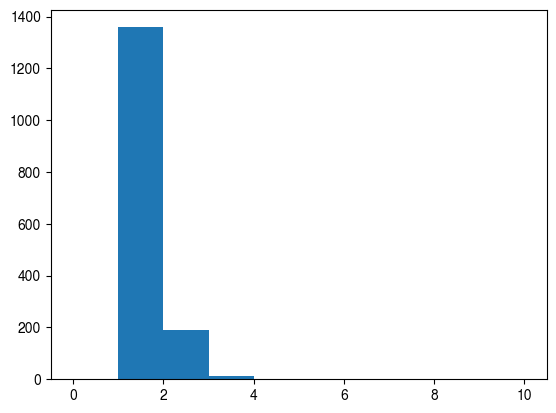

In [4]:
time_distributions = (
    file_df.groupby(['pi', 'date', 'species'])['datetime']
    .apply(lambda group: group.diff().dropna().dt.total_seconds())
)
time_distributions = time_distributions.reset_index(drop=True)

bin_size = 1
bins = np.arange(0, 10 + bin_size, bin_size)


plt.hist(time_distributions[time_distributions < 10], bins=bins)

In [5]:
len(time_distributions[(time_distributions>4)&(time_distributions<10)])/len(time_distributions)
# len(time_distributions[(time_distributions<4)])/len(time_distributions)

0.0

In [6]:
bombus_visits = file_df[(file_df['time_diff'] > 4) | (file_df['time_diff'].isna())]
bombus_visits

,filename,species,sex,pi,datetime,date,time_diff
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,NaN
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,NaN
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,3149.0
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,2741.0
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,5154.0
...,...,...,...,...,...,...,...
1852,pi8_20240801_123139.jpg,nevadensis,male,8,2024-08-01 12:31:39,2024-08-01,NaN
1853,pi8_20240825_133559.jpg,fervidus,male,8,2024-08-25 13:35:59,2024-08-25,NaN
1854,pi9_20240804_120508.jpg,vosnesenskii,female,9,2024-08-04 12:05:08,2024-08-04,NaN
1855,pi9_20240804_121508.jpg,nevadensis,male,9,2024-08-04 12:15:08,2024-08-04,NaN


In [7]:
treatment_times = pd.read_csv('csvs/treatment_times.csv')
treatment_times['datetime'] = pd.to_datetime(treatment_times['datetime'], format='%Y-%m-%d %H:%M:%S')

In [8]:
merged_df = pd.merge(bombus_visits, treatment_times[['pi', 'datetime', 'color']], on=['pi', 'datetime'], how='left')
merged_df

,filename,species,sex,pi,datetime,date,time_diff,color
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,NaN,cnt
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,NaN,cnt
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,3149.0,cnt
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,2741.0,cnt
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,5154.0,cnt
...,...,...,...,...,...,...,...,...
293,pi8_20240801_123139.jpg,nevadensis,male,8,2024-08-01 12:31:39,2024-08-01,NaN,yel
294,pi8_20240825_133559.jpg,fervidus,male,8,2024-08-25 13:35:59,2024-08-25,NaN,cnt
295,pi9_20240804_120508.jpg,vosnesenskii,female,9,2024-08-04 12:05:08,2024-08-04,NaN,blv
296,pi9_20240804_121508.jpg,nevadensis,male,9,2024-08-04 12:15:08,2024-08-04,NaN,blv


In [9]:
merged_df['loc'] = merged_df['datetime'].apply(lambda x: 'clover' if x < pd.Timestamp('2024-07-30') else 'bare')
merged_df

,filename,species,sex,pi,datetime,date,time_diff,color,loc
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,NaN,cnt,clover
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,NaN,cnt,clover
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,3149.0,cnt,clover
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,2741.0,cnt,clover
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,5154.0,cnt,clover
...,...,...,...,...,...,...,...,...,...
293,pi8_20240801_123139.jpg,nevadensis,male,8,2024-08-01 12:31:39,2024-08-01,NaN,yel,bare
294,pi8_20240825_133559.jpg,fervidus,male,8,2024-08-25 13:35:59,2024-08-25,NaN,cnt,bare
295,pi9_20240804_120508.jpg,vosnesenskii,female,9,2024-08-04 12:05:08,2024-08-04,NaN,blv,bare
296,pi9_20240804_121508.jpg,nevadensis,male,9,2024-08-04 12:15:08,2024-08-04,NaN,blv,bare


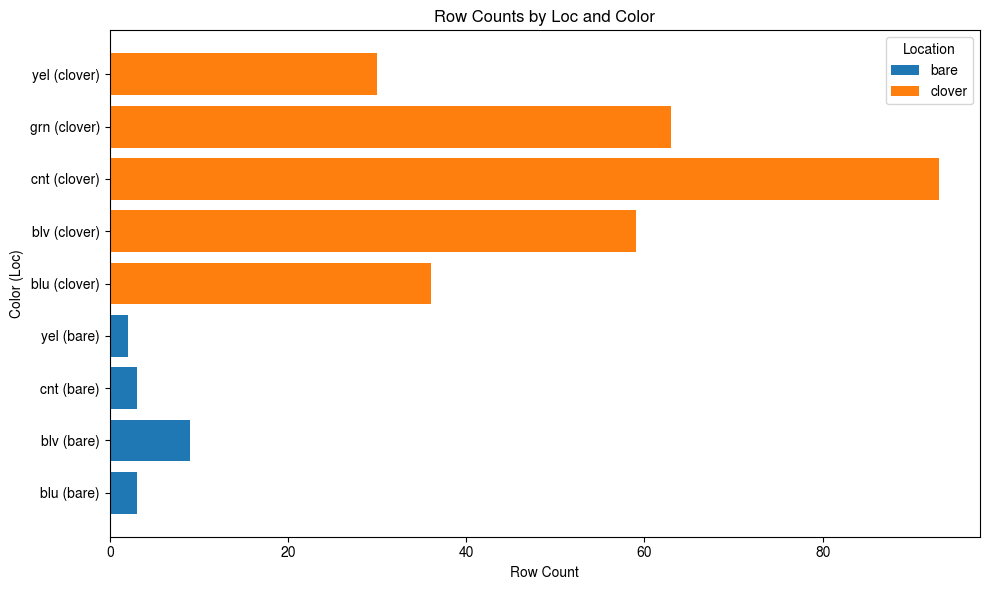

In [10]:
result = merged_df.groupby(['loc', 'color']).size().reset_index(name='row_count')

# Create horizontal barplot
plt.figure(figsize=(10, 6))
for loc in result['loc'].unique():
    subset = result[result['loc'] == loc]
    plt.barh(subset['color'] + f" ({loc})", subset['row_count'], label=loc)

plt.xlabel('Row Count')
plt.ylabel('Color (Loc)')
plt.title('Row Counts by Loc and Color')
plt.legend(title='Location')
plt.tight_layout()

In [11]:
loc_color_counts = merged_df.groupby(['loc', 'color', 'pi']).size().reset_index(name='row_count')
loc_color_counts.columns = ['Location', 'Treatment', 'Trap', 'Counts']
loc_color_counts

,Location,Treatment,Trap,Counts
0,bare,blu,5,2
1,bare,blu,10,1
2,bare,blv,1,4
3,bare,blv,6,2
4,bare,blv,9,3
5,bare,cnt,2,1
6,bare,cnt,3,1
7,bare,cnt,8,1
8,bare,yel,7,1
9,bare,yel,8,1


In [12]:

treatment_times['loc'] = treatment_times['datetime'].apply(lambda x: 'clover' if x < pd.Timestamp('2024-07-30') else 'bare')
treatment_times

,pi,datetime,date,color,loc
0,1,2024-07-11 05:02:04,2024-07-11,cnt,clover
1,1,2024-07-11 05:02:06,2024-07-11,cnt,clover
2,1,2024-07-11 05:02:08,2024-07-11,cnt,clover
3,1,2024-07-11 05:02:11,2024-07-11,cnt,clover
4,1,2024-07-11 05:02:13,2024-07-11,cnt,clover
...,...,...,...,...,...
18163358,10,2024-09-08 11:27:30,2024-09-08,blv,bare
18163359,10,2024-09-08 11:27:31,2024-09-08,blv,bare
18163360,10,2024-09-08 11:27:32,2024-09-08,blv,bare
18163361,10,2024-09-08 11:27:33,2024-09-08,blv,bare


In [13]:
start_time = pd.to_datetime("06:00:00").time()
end_time = pd.to_datetime("20:00:00").time()
treatment_daylight = treatment_times[treatment_times['datetime'].dt.time.between(start_time, end_time)]
# treatment_daylight_clover = treatment_daylight[treatment_daylight['datetime'] < "2024-07-30"]
treatment_runtime = treatment_daylight.groupby(['pi', 'color', 'loc']).size().reset_index(name='runtime')
treatment_runtime

,pi,color,loc,runtime
0,1,blv,bare,741052
1,1,blv,clover,284891
2,1,cnt,clover,80520
3,1,grn,bare,556507
4,1,grn,clover,192311
5,2,blv,bare,534532
6,2,blv,clover,247479
7,2,cnt,bare,858913
8,2,cnt,clover,278153
9,3,blu,bare,201982


In [14]:
loc_color_counts[loc_color_counts['Location'] =='bare']['Counts'].sum()


17

In [15]:
loc_color_counts[loc_color_counts['Location'] =='clover']['Counts'].sum()


281

In [16]:
treatment_runtime[treatment_runtime['loc']=='clover']

,pi,color,loc,runtime
1,1,blv,clover,284891
2,1,cnt,clover,80520
4,1,grn,clover,192311
6,2,blv,clover,247479
8,2,cnt,clover,278153
10,3,blu,clover,234882
13,3,grn,clover,278285
15,4,cnt,clover,181337
17,4,grn,clover,92037
19,4,yel,clover,278240


In [17]:
all_combinations =treatment_runtime[treatment_runtime['loc']=='clover'][['color', 'pi', 'loc']].drop_duplicates()

loc_col_run = (
    all_combinations
    .merge(
        loc_color_counts,
        left_on=["color", "pi", "loc"],
        right_on=["Treatment", "Trap", "Location"],
        how="left"
    )
    .drop(columns=["Treatment", "Trap", "Location"])  )

loc_col_run

,color,pi,loc,Counts
0,blv,1,clover,9
1,cnt,1,clover,40
2,grn,1,clover,8
3,blv,2,clover,14
4,cnt,2,clover,6
5,blu,3,clover,8
6,grn,3,clover,3
7,cnt,4,clover,13
8,grn,4,clover,17
9,yel,4,clover,4


In [18]:
loc_col_run = loc_color_counts.merge(
    treatment_runtime,
    left_on=["Treatment", "Trap", "Location"],
    right_on=["color", "pi", 'loc'],
    how="right")#.drop(columns=["Treatment", "Trap", "Location"])#.to_csv('csvs/loc_color_counts.csv')
loc_col_run = loc_col_run[loc_col_run['loc']=='clover'].drop(columns=["Treatment", "Trap", "Location"]) 


In [41]:
runtime_clover = loc_col_run[loc_col_run['loc']=='clover'].drop(columns=["loc"])
# runtime_clover['visits_per_hour'] = runtime_clover['Counts']/(runtime_clover['runtime']/3600)
grouped_counts_clover = runtime_clover.groupby('color', as_index=False)[['Counts', 'runtime']].sum()
grouped_counts_clover['counts_per_hour'] = grouped_counts_clover['Counts']/(grouped_counts_clover['runtime']/3600)
grouped_counts_clover

,color,Counts,runtime,counts_per_hour
0,blu,36.0,1027392,0.126145
1,blv,59.0,1077643,0.197097
2,cnt,93.0,1094735,0.305827
3,grn,63.0,1120669,0.202379
4,yel,30.0,1152301,0.093726


In [42]:
grouped_counts_clover['runtime_hours'] = grouped_counts_clover['runtime']/3600
grouped_counts_clover.to_csv('csvs/grouped_counts_clover.csv')

In [43]:
grouped_counts_clover['Counts'].sum()

281.0

In [22]:
runtime_clover['counts_per_hour'] = runtime_clover['Counts']/(runtime_clover['runtime']/3600)
runtime_clover = runtime_clover.sort_values('color').reset_index(drop=True)

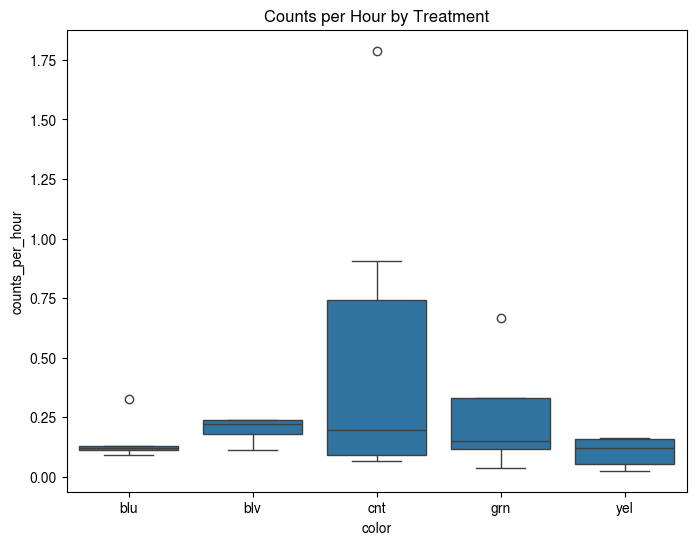

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='counts_per_hour', data=runtime_clover)
plt.title('Counts per Hour by Treatment')
plt.show()

(array([1.70000e+01, 5.18000e+02, 1.26660e+04, 6.61370e+04, 1.52525e+05,
        1.81814e+05, 6.85560e+04, 1.64700e+04, 1.23000e+03, 6.70000e+01]),
 array([0.07893669, 0.09998648, 0.12103626, 0.14208605, 0.16313583,
        0.18418562, 0.2052354 , 0.22628519, 0.24733497, 0.26838476,
        0.28943454]),
 <BarContainer object of 10 artists>)

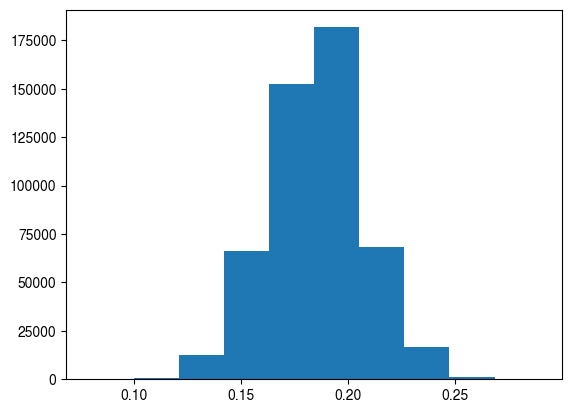

In [24]:


# treatments = ['blu', 'blv', 'cnt', 'grn', 'yel']
# n_choices = int(grouped_counts_clover['Counts'].sum())
# n_bootstrap = 100000 
# mean_runtime = grouped_counts_clover['runtime'].mean()

# # random_choices = np.random.choice(treatments, size=n_choices)
# # choice_counts = pd.Series(random_choices).value_counts()

# bootstrap_distributions = []
# for _ in range(n_bootstrap):
#     bootstrap_sample = np.random.choice(treatments, size=n_choices, replace=True)
#     bootstrap_counts = pd.Series(bootstrap_sample).value_counts()
#     bootstrap_distributions.append(bootstrap_counts)
# bootstrap_df = pd.DataFrame(bootstrap_distributions).fillna(0).astype(int)

# bootstrap_df_pertime = bootstrap_df.divide(mean_runtime)
# all_values = bootstrap_df_pertime.values.flatten()
# all_values = all_values*3600
# plt.hist(all_values)


In [25]:
grouped_counts_clover

,color,Counts,runtime,counts_per_hour,runtime_hours
0,blu,36.0,1027392,0.126145,285.386667
1,blv,59.0,1077643,0.197097,299.345278
2,cnt,93.0,1094735,0.305827,304.093056
3,grn,63.0,1120669,0.202379,311.296944
4,yel,30.0,1152301,0.093726,320.083611


In [26]:
# import itertools
# import pandas as pd
# import math
# from scipy.stats import norm
# from scipy.stats import poisson

# def calculate_incidence_rate(events, person_time):
#     rate = events / person_time
#     return rate

# def calculate_poisson_incidence_rate_ci(events, person_time):
#     rate = events / person_time
#     # Calculate exact Poisson confidence limits for event count
#     ci_lower = poisson.ppf(0.025, events) / person_time if events > 0 else 0
#     ci_upper = poisson.ppf(0.975, events) / person_time
#     return rate, ci_lower, ci_upper


# def calculate_incidence_rate_ci(events, person_time):
#     rate = events / person_time
#     se_rate = math.sqrt(events) / person_time  # Standard Error
#     z = norm.ppf(0.975)  # 95% confidence, two-tailed
#     ci_lower = rate - z * se_rate
#     ci_upper = rate + z * se_rate
#     return rate, max(0, ci_lower), ci_upper  # CI lower bound can't be negative

# def calculate_rate_difference_ci_and_p(events1, time1, events2, time2):
#     rate1 = events1 / time1
#     rate2 = events2 / time2
#     se_diff = math.sqrt(events1 / time1**2 + events2 / time2**2)
#     diff = rate2 - rate1
#     z = norm.ppf(0.975)
#     ci_lower = diff - z * se_diff
#     ci_upper = diff + z * se_diff
#     z_score = diff / se_diff
#     p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test
#     return diff, ci_lower, ci_upper, p_value

# def calculate_rate_ratio_ci_and_p(events1, time1, events2, time2):
#     rate1 = events1 / time1
#     rate2 = events2 / time2
#     rate_ratio = rate1 / rate2
#     se_log_rr = math.sqrt(1 / events1 + 1 / events2)  # Standard error of log(rate ratio)
#     z = norm.ppf(0.975)
#     log_rr = math.log(rate_ratio)
#     ci_lower_log = log_rr - z * se_log_rr
#     ci_upper_log = log_rr + z * se_log_rr
#     ci_lower = math.exp(ci_lower_log)
#     ci_upper = math.exp(ci_upper_log)
#     z_score = log_rr / se_log_rr
#     p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test
#     return rate_ratio, ci_lower, ci_upper, p_value


# # Create pairwise combinations of groups
# pairwise_results = []
# for (group1, group2) in itertools.combinations(grouped_counts_clover['color'], 2):
#     row1 = grouped_counts_clover[grouped_counts_clover['color'] == group1].iloc[0]
#     row2 = grouped_counts_clover[grouped_counts_clover['color'] == group2].iloc[0]
    
#     events1, time1 = row1['Counts'], row1['runtime_hours']
#     events2, time2 = row2['Counts'], row2['runtime_hours']
    
#     # Calculate incidence rates
#     rate1, rate1_ci_lower, rate1_ci_upper = calculate_poisson_incidence_rate_ci(events1, time1)
#     rate2, rate2_ci_lower, rate2_ci_upper = calculate_poisson_incidence_rate_ci(events2, time2)
    
#     # Calculate rate difference and P-value
#     diff, diff_ci_lower, diff_ci_upper, diff_p_value = calculate_rate_difference_ci_and_p(events1, time1, events2, time2)
    
#     # Calculate rate ratio and P-value
#     rate_ratio, rr_ci_lower, rr_ci_upper, rr_p_value = calculate_rate_ratio_ci_and_p(events1, time1, events2, time2)
    
#     # Append results
#     pairwise_results.append({
#         'Group 1': group1,
#         'Group 2': group2,
#         'Rate 1': rate1,
#         'Rate 2': rate2,
#         'Rate Difference': diff,
#         'Rate Difference CI': (diff_ci_lower, diff_ci_upper),
#         'Rate Difference P-value': diff_p_value,
#         'Rate Ratio': rate_ratio,
#         'Rate Ratio CI': (rr_ci_lower, rr_ci_upper),
#         'Rate Ratio P-value': rr_p_value
#     })

# # Convert results to a DataFrame for display
# pairwise_results = pd.DataFrame(pairwise_results)
# pairwise_results

,Group 1,Group 2,Rate 1,Rate 2,Rate Difference,Rate Difference CI,Rate Difference P-value,Rate Ratio,Rate Ratio CI,Rate Ratio P-value
0,blu,blv,0.126145,0.197097,0.070952,"(0.00593453214243142, 0.13596980055561356)",3.244692e-02,0.640014,"(0.4228348750925683, 0.9687409157250954)",3.484722e-02
1,blu,cnt,0.126145,0.305827,0.179683,"(0.1051083756260517, 0.25425720803357454)",2.330535e-06,0.412470,"(0.28074271986203864, 0.6060050572107953)",6.433773e-06
2,blu,grn,0.126145,0.202379,0.076234,"(0.011462801702492975, 0.14100613581261995)",2.106465e-02,0.623309,"(0.41386960217993635, 0.9387343957145757)",2.366224e-02
3,blu,yel,0.126145,0.093726,-0.032419,"(-0.08554930181243658, 0.020711032003072456)",2.317211e-01,1.345894,"(0.8290645621899411, 2.1849105332970034)",2.294945e-01
4,blv,cnt,0.197097,0.305827,0.108731,"(0.028776350740055398, 0.18868490022152584)",7.690256e-03,0.644471,"(0.46508279755023313, 0.8930505288770154)",8.301220e-03
5,blv,grn,0.197097,0.202379,0.005282,"(-0.06561700189184073, 0.07618160670890868)",8.839011e-01,0.973899,"(0.6828143911187815, 1.3890732607397798)",8.839343e-01
6,blv,yel,0.197097,0.093726,-0.103371,"(-0.16382092600713863, -0.042921676500270484)",8.034090e-04,2.102915,"(1.3550347144587147, 3.263571601921767)",9.167662e-04
7,cnt,grn,0.305827,0.202379,-0.103448,"(-0.18320270943806655, -0.023693936706446747)",1.101437e-02,1.511161,"(1.0975313261906583, 2.080676605375658)",1.139661e-02
8,cnt,yel,0.305827,0.093726,-0.212102,"(-0.28272917308560774, -0.14147468038338262)",3.956487e-09,3.263012,"(2.16219389790678, 4.924278661949002)",1.775517e-08
9,grn,yel,0.202379,0.093726,-0.108654,"(-0.16883859538028154, -0.04846861194419553)",4.025958e-04,2.159275,"(1.3979449092817655, 3.3352292650454767)",5.201140e-04


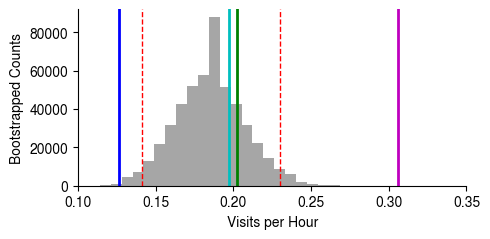

In [27]:
# color_hatch_map = {
#     'blu': 'b',
#     'blv': 'c',
#     'cnt': 'm',
#     'grn': 'g',
#     'yel': 'y'
# }

# lower_bound = np.percentile(all_values, 2.5)
# upper_bound = np.percentile(all_values, 97.5)
# observed_values = grouped_counts_clover['counts_per_hour']

# plt.figure(figsize=(5, 2.5))
# plt.hist(all_values, bins=30, alpha=0.7, color='grey')

# plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='95% CI Lower')
# plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='95% CI Upper')

# for idx, row in grouped_counts_clover.iterrows():
#     obs_value = row['counts_per_hour']
#     color_key = row['color']
#     line_color = color_hatch_map.get(color_key, 'black')  
#     plt.axvline(obs_value, color=line_color, linestyle='solid', linewidth=2, label=f'{color_key}')
# ax=plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.xlim(0.1, 0.35)
# plt.ylabel('Bootstrapped Counts')
# plt.xlabel('Visits per Hour')
# plt.tight_layout()
# # plt.legend()



In [28]:
# def compute_p_value(bootstrap_values, observed_value):
#     bootstrap_values = np.array(bootstrap_values)
#     if observed_value > np.mean(bootstrap_values):
#         p_value = np.mean(bootstrap_values >= observed_value)
#     else:
#         p_value = np.mean(bootstrap_values <= observed_value)
#     p_value *= 2
#     p_value = min(p_value, 1.0)
#     return p_value

# p_values = [compute_p_value(all_values, obs) for obs in observed_values]

# for obs, p_val in zip(observed_values, p_values):
#     print(f'Observed Value: {obs}, p-value: {p_val}')

Observed Value: 0.12614464586058682, p-value: 0.006088
Observed Value: 0.1970968122096093, p-value: 0.614888
Observed Value: 0.30582743769039994, p-value: 0.0
Observed Value: 0.20237911461814329, p-value: 0.425872
Observed Value: 0.09372551095590476, p-value: 1.2e-05


In [29]:
# np.mean((all_values >= 0.296126) | (all_values <= (2 * all_values.mean() - 0.296126)))

0.0

In [30]:
# grouped_means['visits_per_hour'].values

In [31]:
# from scipy.stats import norm

# mean_boot = np.mean(all_values)
# std_boot = np.std(all_values, ddof=1)

# for value in grouped_means['visits_per_hour'].values:
#     z_score = (value - mean_boot) / std_boot
#     p_value = norm.sf(z_score)
#     print(value, z_score, p_value)


In [32]:
# observed_counts = grouped_means.set_index('Treatment')['visits_per_hour']

# p_values = {}
# for treatment, observed in observed_counts.items():
#     bootstrap_dist = all_values

#     p = np.mean((bootstrap_dist >= observed) | (bootstrap_dist <= (2 * bootstrap_dist.mean() - observed)))
#     p_values[treatment] = p

# for treatment, p in p_values.items():
#     print(f'Treatment: {treatment}, p-value: {p:.4f}')


In [44]:
grouped_counts_clover

,color,Counts,runtime,counts_per_hour,runtime_hours
0,blu,36.0,1027392,0.126145,285.386667
1,blv,59.0,1077643,0.197097,299.345278
2,cnt,93.0,1094735,0.305827,304.093056
3,grn,63.0,1120669,0.202379,311.296944
4,yel,30.0,1152301,0.093726,320.083611


In [47]:

color_order = [4,0,3,1,2]
grouped_counts_clover = grouped_counts_clover.reindex(color_order).reset_index(drop=True)
grouped_counts_clover

,color,Counts,runtime,counts_per_hour,runtime_hours
0,yel,30.0,1152301,0.093726,320.083611
1,blu,36.0,1027392,0.126145,285.386667
2,grn,63.0,1120669,0.202379,311.296944
3,blv,59.0,1077643,0.197097,299.345278
4,cnt,93.0,1094735,0.305827,304.093056


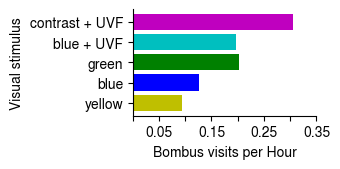

In [50]:

color_hatch_map = {
    'blu': ('b', ''),
    'blv': ('c', ''),
    'cnt': ('m', ''),
    'grn': ('g', ''),
    'yel': ('y', '')
}

color_name_map = {
    'yel': 'yellow',
    'blu': 'blue',
    
    'grn': 'green',
    'blv': 'blue + UVF',
    
    'cnt': 'contrast + UVF'
}

plt.figure(figsize=(3.5, 1.8))
ax = plt.gca()

for i, row in grouped_counts_clover.iterrows():
    color = row['color']
    counts_per_hour = row['counts_per_hour']
    plot_color, hatch_pattern = color_hatch_map.get(color, ('grey', ''))
    ax.barh(i, counts_per_hour, label=color, color=plot_color, hatch=hatch_pattern)

ytick_labels = [color_name_map.get(color, color) for color in color_name_map]
ax.set_yticks(range(len(color_name_map)))
ax.set_yticklabels(ytick_labels)
ax.set_xticks(np.arange(0, 0.40, 0.05), labels=['','0.05', '','0.15', '','0.25', '', '0.35'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Visual stimulus')
plt.xlabel('Bombus visits per Hour')

plt.tight_layout()

plt.savefig('figs/visits_per_hour.svg', format='svg')

In [34]:
# color_counts = merged_df['color'].value_counts()

# color_hatch_map = {
#     'blu': ('b', ''),
#     'blv': ('c', ''),
#     'cnt': ('g', '///'),
#     'grn': ('g', ''),
#     'yel': ('y', '')
# }

# color_name_map = {
#     'blu': 'blue',
#     'blv': 'blue + UV',
#     'cnt': 'contrast + UV',
#     'grn': 'green',
#     'yel': 'yellow'
# }

# plt.figure(figsize=(4,2))

# # plt.bar(color_counts.index, color_counts)
# ax = plt.gca()

# for i, color in enumerate(color_counts.index):
#     plot_color, hatch_pattern = color_hatch_map.get(color, ('grey', ''))
#     ax.barh(i, grouped_counts_clover[color], label=color, color=plot_color, hatch=hatch_pattern)

# ytick_labels = [color_name_map.get(color, color) for color in color_counts.index]
# ax.set_yticks(range(len(color_counts.index)))
# ax.set_yticklabels(ytick_labels)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.ylabel('Treatment')
# plt.xlabel('Bombus visits')

# plt.tight_layout()

In [35]:
# color_counts.values

NameError: name 'color_counts' is not defined

In [ ]:
# from scipy.stats import chisquare

# chi2_stat, p_value = chisquare(f_obs=color_counts.values)

# print(f"Chi-square Statistic: {chi2_stat:.2f}")
# print(f"p-value: {p_value:.9f}")

Chi-square Statistic: 43.51
p-value: 0.000000008


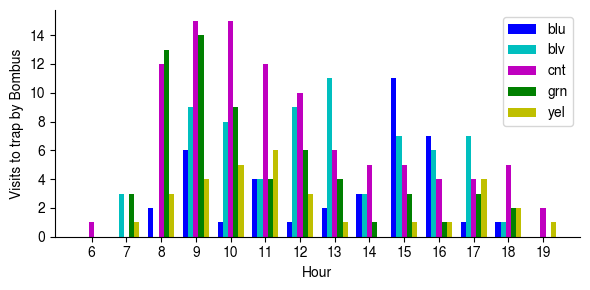

In [ ]:

merged_df['hour'] = merged_df['datetime'].dt.hour
merged_df['date_hour'] = merged_df['datetime'].dt.date

bombus_hour_counts = merged_df.groupby(['color', 'hour']).size().unstack(fill_value=0)
bombus_hour_counts = bombus_hour_counts.stack().reset_index()
bombus_hour_counts.columns = ['color', 'hour', 'count']
bombus_pivot = bombus_hour_counts.pivot(index='hour', columns='color', values='count').fillna(0)

color_hatch_map = {
    'cnt': ('m', ''),
    'blu': ('b', ''),
    'blv': ('c', ''),
    'grn': ('g', ''),
    'yel': ('y', '')
}

fig, ax = plt.subplots(figsize=(6, 3))
bar_width = 0.15
index_array = np.arange(len(bombus_pivot.index))
colors = bombus_pivot.columns
max_value = bombus_pivot.values.max()


for i, color in enumerate(colors):
    plot_color, hatch_pattern = color_hatch_map.get(color, ('grey', ''))
    ax.bar(index_array + i * bar_width, bombus_pivot[color], width=bar_width, label=color, color=plot_color, hatch=hatch_pattern)

ax.set_xticks(index_array + bar_width * (len(colors) - 1) / 2)
ax.set_xticklabels(bombus_pivot.index, rotation=0)
ax.set_xlabel('Hour')
ax.set_ylabel('Visits to trap by Bombus')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# # ax.set_yscale('log')

# ax.annotate(f'{int(max_value)}', xy=(0, max_value), xytext=(-40, 1),
#             textcoords='offset points', ha='right', va='center', fontsize=10, color='k')

plt.tight_layout()

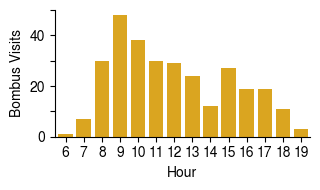

In [ ]:
total_counts_per_hour = bombus_pivot.sum(axis=1)

fig, ax = plt.subplots(figsize=(3.3, 2))
ax.bar(total_counts_per_hour.index, total_counts_per_hour, color='goldenrod')
ax.set_xlabel('Hour')
ax.set_ylabel('Bombus Visits')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(0,50)
plt.yticks([0,10,20,30,40,50], labels=['0', '', '20', '', '40', ''])

plt.xlim(5.4, 19.5)
plt.xticks(total_counts_per_hour.index)

plt.tight_layout()

plt.savefig('figs/hourly_visits.svg', format='svg')

In [ ]:
periods = [('2024-07-11', '2024-07-18'),
           ('2024-07-18', '2024-07-23'), 
           ('2024-07-23', '2024-08-15'), 
           ('2024-08-15', '2024-09-03'),
           ('2024-09-03', '2024-09-10'), 
           ]
periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in periods]

def find_start_of_period(row_datetime):
    for start, end in periods:
        if start <= row_datetime < end:
            return start
    return None 


In [ ]:
merged_df["start_of_period"] = merged_df["datetime"].apply(find_start_of_period)
merged_df["elapsed_time"] = (merged_df["datetime"] - merged_df["start_of_period"]).dt.total_seconds() / 3600

merged_df

,filename,species,sex,pi,datetime,date,time_diff,color,loc,hour,date_hour,start_of_period,elapsed_time
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,NaN,cnt,clover,8,2024-07-11,2024-07-11,8.730833
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,NaN,cnt,clover,9,2024-07-11,2024-07-11,9.043611
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,3149.0,cnt,clover,9,2024-07-11,2024-07-11,9.918333
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,2741.0,cnt,clover,10,2024-07-11,2024-07-11,10.679722
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,5154.0,cnt,clover,12,2024-07-11,2024-07-11,12.111389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,pi8_20240801_123139.jpg,nevadensis,male,8,2024-08-01 12:31:39,2024-08-01,NaN,yel,bare,12,2024-08-01,2024-07-23,228.527500
294,pi8_20240825_133559.jpg,fervidus,male,8,2024-08-25 13:35:59,2024-08-25,NaN,cnt,bare,13,2024-08-25,2024-08-15,253.599722
295,pi9_20240804_120508.jpg,vosnesenskii,female,9,2024-08-04 12:05:08,2024-08-04,NaN,blv,bare,12,2024-08-04,2024-07-23,300.085556
296,pi9_20240804_121508.jpg,nevadensis,male,9,2024-08-04 12:15:08,2024-08-04,NaN,blv,bare,12,2024-08-04,2024-07-23,300.252222


In [ ]:
merged_df_5hr = merged_df[merged_df['elapsed_time']<120]

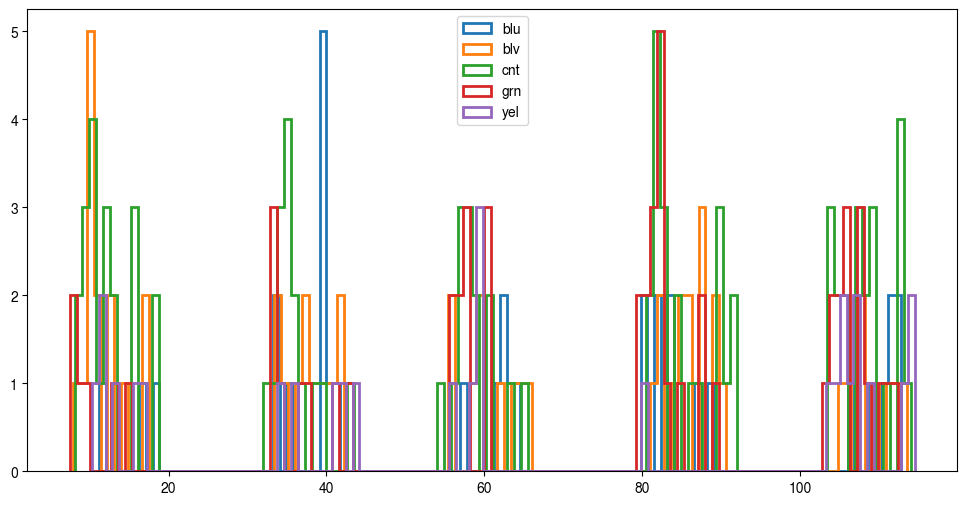

In [ ]:
plt.figure(figsize=(12, 6))



for color in colors:
    subset = merged_df_5hr[merged_df_5hr["color"] == color]
    plt.hist(
        subset["elapsed_time"],
        bins=120,
        histtype="step",
        label=color,
        linewidth=2,
        density=False
    )
plt.legend()



/tmp/ipykernel_325731/2432876882.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df_5hr, y="color", x="elapsed_time", palette=color_map, orient='h', width=0.5, linewidth=1)


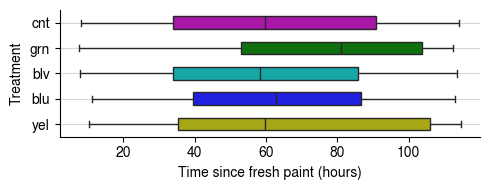

In [ ]:
import seaborn as sns

color_map = {
    'cnt': 'm',
    'blu': 'b',
    'blv': 'c',
    'grn': 'g',
    'yel': 'y'
}

plt.figure(figsize=(5, 2))
sns.boxplot(data=merged_df_5hr, y="color", x="elapsed_time", palette=color_map, orient='h', width=0.5, linewidth=1)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.set_yticklabels(ytick_labels)
plt.ylabel("Treatment")
plt.xlabel("Time since fresh paint (hours)")
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
distributions = merged_df_5hr.groupby('color')['elapsed_time'].apply(list)
dist_dict = distributions.to_dict()

In [ ]:
from scipy.stats import kruskal

elapsed_time_dists = [dist for dist in dist_dict.values()]

stat, p = kruskal(*elapsed_time_dists)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("At least one distribution is significantly different.")
else:
    print("No significant differences found.")


Kruskal-Wallis H-statistic: 10.841880046416911, p-value: 0.02839973413891523
At least one distribution is significantly different.


In [ ]:
from itertools import combinations
from scipy.stats import mannwhitneyu

treatments = merged_df_5hr['color'].unique()
for a, b in combinations(treatments, 2):
    group_a = merged_df_5hr[merged_df_5hr['color'] == a]['elapsed_time']
    group_b = merged_df_5hr[merged_df_5hr['color'] == b]['elapsed_time']
    stat, p = mannwhitneyu(group_a, group_b, alternative='two-sided')
    print(f"Mann-Whitney U Test ({a} vs {b}): U-statistic={stat}, p-value={p}")


Mann-Whitney U Test (cnt vs grn): U-statistic=2881.0, p-value=0.31047024089799646
Mann-Whitney U Test (cnt vs blv): U-statistic=4722.5, p-value=0.07379730570485966
Mann-Whitney U Test (cnt vs blu): U-statistic=1932.0, p-value=0.2968089253185777
Mann-Whitney U Test (cnt vs yel): U-statistic=1483.0, p-value=0.34463070034064114
Mann-Whitney U Test (grn vs blv): U-statistic=3217.0, p-value=0.007405652328595979
Mann-Whitney U Test (grn vs blu): U-statistic=1365.0, p-value=0.9486979498545309
Mann-Whitney U Test (grn vs yel): U-statistic=1039.0, p-value=1.0
Mann-Whitney U Test (blv vs blu): U-statistic=1255.0, p-value=0.010726109108153596
Mann-Whitney U Test (blv vs yel): U-statistic=970.0, p-value=0.022208998421295152
Mann-Whitney U Test (blu vs yel): U-statistic=711.0, p-value=0.9916384618667783


In [ ]:
merged_df_5hr.groupby('color')['elapsed_time'].agg(['mean', 'std']).assign(cv=lambda x: x['std'] / x['mean'])


,mean,std,cv
color,,,
blu,63.932203,31.206173,0.488114
blv,48.966739,33.508998,0.684322
cnt,59.377880,35.597262,0.599504
grn,66.778783,32.262917,0.483131
yel,65.025800,38.042371,0.585035
